In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [2]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.
Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică. 
După instalare trebuie să facem restart la runtime.

In [5]:
!pip uninstall pandas-profiling

In [6]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 2.2MB/s  eta 0:00:01
     |████████████████████████████████| 6.5MB 20.6MB/s eta 0:00:01
     |████████████████████████████████| 10.0MB 33.7MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 63.0MB/s eta 0:00:01
     |████████████████████████████████| 12.4MB 57.1MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 11.4MB/s eta 0:00:01
     |████████████████████████████████| 61kB 34.1MB/s eta 0:00:01
     |████████████████████████████████| 71kB 37.6MB/s eta 0:00:01
     |████████████████████████████████| 614kB 45.7MB/s eta 0:00:01
     |████████████████████████████████| 133kB 37.5MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 64.1MB/s eta 0:00:01
     |████████████████████████████████| 296kB 16.0MB/s eta 0:00:01


  Created wheel for confuse: filename=confuse-1.1.0-cp37-none-any.whl size=17573 sha256=26006b6eff67fcdc3217dac4e9b4b810ae19639fcfa2378e41aecda8b2a3af4d
  Stored in directory: /home/ioana/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27086 sha256=77ec1c820b7eb73a363093a4c9255b377652616c0057664a71c13fb6020fae22
  Stored in directory: /home/ioana/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=868d33f23d00dba3d50e13225d3eb555b9983f9261a8dc5a0196baa63f1bf88d
  Stored in directory: /home/ioana/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built confuse htmlmin imagehash
ERROR: phik 0.9.12 has requirement joblib>=0.14.1, but you'll have joblib 0.13.2 which is incompatible.
  Found existing installation: networkx 2.3


    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3
  Found existing installation: attrs 19.2.0
    Uninstalling attrs-19.2.0:
      Successfully uninstalled attrs-19.2.0
  Found existing installation: pandas 0.25.1
    Uninstalling pandas-0.25.1:
      Successfully uninstalled pandas-0.25.1
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1
  Found existing installation: astropy 3.2.2
    Uninstalling astropy-3.2.2:
      Successfully uninstalled astropy-3.2.2
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
  Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled requests-2.22.0
  Found existing installation: tqdm 4.36.1
    Uninstalling tqdm-4.36.1:
      Successfully uninstalled tqdm-4.36.1
  Found existing installation: Jinja2 2.10.3
    Uninstalling Jinja2-2.

In [7]:
from pandas_profiling import ProfileReport

In [8]:
prof=ProfileReport(df)

ValueError: Invalid RGBA argument: '#000'

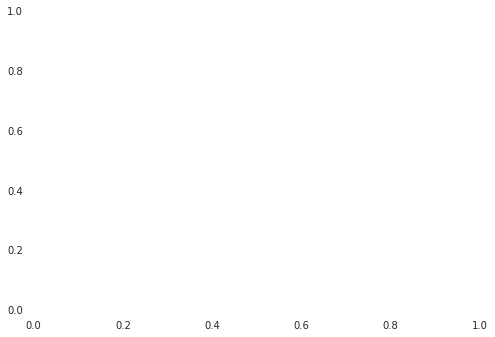

In [9]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='output.html')

ValueError: Invalid RGBA argument: '#000'

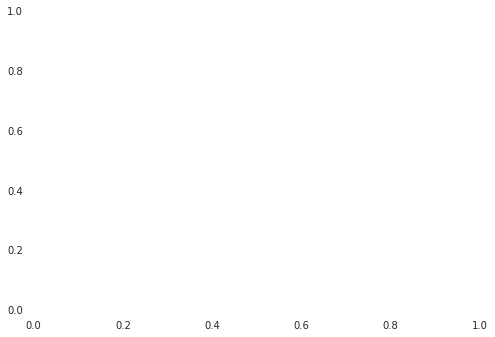

In [10]:
prof

In [11]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [13]:
prof.to_file(output_file='output-min.html')

In [0]:
prof

In [14]:
#Selectăm datele de intrare in retea eliminand ultima coloană din csv
X = df.drop("target", axis=1)
#obținem etichetele pentru date salvand ultima coloana
y = df['target']

In [15]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [16]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [17]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(129, 242)

In [18]:
sum(y_test), len(y_test)

(36, 61)

In [19]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler

In [20]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3


In [21]:
y_train

155    1
270    0
245    0
187    0
258    0
      ..
26     1
177    0
259    0
169    0
18     1
Name: target, Length: 242, dtype: int64

In [22]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min


sc = MinMaxScaler((-1, 1))

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_test

array([[ 0.        , -1.        , -1.        , -0.32075472, -0.05154639,
        -1.        , -1.        ,  0.09923664, -1.        , -0.85714286,
         0.        , -1.        ,  0.33333333],
       [-0.45833333, -1.        , -1.        , -0.8490566 , -0.04467354,
        -1.        , -1.        , -0.22137405, -1.        , -0.78571429,
         0.        , -1.        ,  0.33333333],
       [-0.41666667,  1.        , -1.        , -0.69811321, -0.41580756,
        -1.        ,  0.        ,  0.3740458 , -1.        , -1.        ,
         1.        , -1.        ,  1.        ],
       [ 0.41666667, -1.        , -1.        , -0.43396226, -0.51202749,
        -1.        ,  0.        , -0.00763359,  1.        , -1.        ,
         0.        , -1.        ,  0.33333333],
       [-0.375     ,  1.        ,  0.33333333, -0.32075472, -0.26460481,
        -1.        ,  0.        ,  0.64885496,  1.        , -0.85714286,
         1.        , -1.        ,  0.33333333],
       [-0.41666667, -1.      

In [25]:
len(X_train)

242

In [26]:
from torch.utils.data import Dataset, DataLoader

In [27]:
import torch
from torch import nn, optim

In [28]:
#Dataset - o clasă din PyTorch foarte utilă gestionării seturilor de date
class Dataset(Dataset):
    """ Diabetes dataset."""
    # Initialize your data, download, etc.
    def __init__(self, x, y):
        #Citim setul de date
        self.len = len(x)

        self.x=torch.tensor(x).float()
        self.y=torch.tensor(y.values).long()

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [29]:
trainDataset=Dataset(X_train, y_train)

In [30]:
trainDataset[0]

(tensor([ 0.2083, -1.0000, -1.0000, -0.3208, -0.5120, -1.0000,  0.0000, -0.0840,
         -1.0000, -0.7857,  0.0000, -1.0000,  0.3333]), tensor(1))

In [31]:
trainLoader=DataLoader(dataset=trainDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [32]:
validationDataset=Dataset(X_test, y_test)

In [33]:
validationLoader=DataLoader(dataset=validationDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [34]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()

        #Sequential oferă o alternativă mai estetică a codului
        #Rețeaua noastră are 2 neuroni pentru output. 
        #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
        self.sequential= nn.Sequential(
            nn.Linear(13,100),
            nn.ReLU(),
            nn.Linear(100, 60),
            nn.ReLU(),
            nn.Linear(60, 2)
        )


    def forward(self, x):
        return self.sequential(x)

In [35]:
net = HeartDiseaseNN()

In [36]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [37]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
train_losses = []

In [38]:
# Colectăm accuratetea pentru a o plota ulterior
accuracies=[]

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()
    losses=[]
    for batch_idx, data in enumerate(trainLoader, 0):
      inputs, labels =data
      #Obținem predictii
      outputs = net(inputs)
      # Compute and print loss
      loss = criterion(outputs, labels)

      losses.append(loss.item())
      # Zero gradients, perform a backward pass, and update the weights.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      print(f"[Train Epoch: {epoch}, Batch: {batch_idx+1}, Loss: {loss.item()}")
    mean_loss=sum(losses)/len(losses)
    scheduler.step(mean_loss)
    train_losses.append(mean_loss)
    print(f"[TRAIN] Epoch: {epoch} Loss:{mean_loss}")

In [41]:
# Colectăm loss-ul din validare pentru a o plota ulterior
test_losses=[]

In [42]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    test_loss=[]
    correct = 0

    with torch.no_grad():
        for batch_idx, data in enumerate(validationLoader, 0):
          inputs, labels = data

          output=net(inputs)

          loss= criterion(output, labels)
          test_loss.append(loss.item())

          #Obținem predictiile pentru fiecare linie din setul de validare.
          #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare 
          pred = output.data.max(1, keepdim=True)[1]

          #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
          correct += pred.eq(labels.data.view_as(pred)).sum()
          current_correct=pred.eq(labels.data.view_as(pred)).sum()          
          print("============")
          print(f"[Validation set] Batch index: {batch_idx+1} Batch loss: {loss.item()}, Accuracy: {100. * current_correct/len(inputs)}%")
          print("============")
        mean_loss=sum(test_loss)/len(test_loss)
        test_losses.append(mean_loss)
        accuracy = 100. * correct/len(validationLoader.dataset)
        print(f"[Validation set] Loss: {mean_loss}, Accuracy: {accuracy}%")
          
        accuracies.append(accuracy)


In [43]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(100):
  train(epoch)
  validation()

[Train Epoch: 0, Batch: 1, Loss: 0.6840814352035522
[Train Epoch: 0, Batch: 2, Loss: 0.6904535889625549
[Train Epoch: 0, Batch: 3, Loss: 0.6935496926307678
[Train Epoch: 0, Batch: 4, Loss: 0.6955793499946594
[Train Epoch: 0, Batch: 5, Loss: 0.7073678374290466
[Train Epoch: 0, Batch: 6, Loss: 0.7050849795341492
[Train Epoch: 0, Batch: 7, Loss: 0.7035866379737854
[Train Epoch: 0, Batch: 8, Loss: 0.6887059807777405
[TRAIN] Epoch: 0 Loss:0.696051187813282
[Validation set] Batch index: 1 Batch loss: 0.6864393353462219, Accuracy: 62.5%
[Validation set] Batch index: 2 Batch loss: 0.6945700645446777, Accuracy: 51.72413635253906%
[Validation set] Loss: 0.6905046999454498, Accuracy: 57.37704849243164%
[Train Epoch: 1, Batch: 1, Loss: 0.6892592310905457
[Train Epoch: 1, Batch: 2, Loss: 0.695683479309082
[Train Epoch: 1, Batch: 3, Loss: 0.6824958324432373
[Train Epoch: 1, Batch: 4, Loss: 0.6927852630615234
[Train Epoch: 1, Batch: 5, Loss: 0.6932699084281921
[Train Epoch: 1, Batch: 6, Loss: 0.69505

[Train Epoch: 11, Batch: 1, Loss: 0.6507794857025146
[Train Epoch: 11, Batch: 2, Loss: 0.6314398050308228
[Train Epoch: 11, Batch: 3, Loss: 0.6425233483314514
[Train Epoch: 11, Batch: 4, Loss: 0.6401515603065491
[Train Epoch: 11, Batch: 5, Loss: 0.6605549454689026
[Train Epoch: 11, Batch: 6, Loss: 0.6412620544433594
[Train Epoch: 11, Batch: 7, Loss: 0.6338078379631042
[Train Epoch: 11, Batch: 8, Loss: 0.6244063377380371
[TRAIN] Epoch: 11 Loss:0.6406156718730927
[Validation set] Batch index: 1 Batch loss: 0.6176984906196594, Accuracy: 84.375%
[Validation set] Batch index: 2 Batch loss: 0.6609209775924683, Accuracy: 62.068965911865234%
[Validation set] Loss: 0.6393097341060638, Accuracy: 73.77049255371094%
[Train Epoch: 12, Batch: 1, Loss: 0.6894829869270325
[Train Epoch: 12, Batch: 2, Loss: 0.6340404748916626
[Train Epoch: 12, Batch: 3, Loss: 0.6566161513328552
[Train Epoch: 12, Batch: 4, Loss: 0.605076789855957
[Train Epoch: 12, Batch: 5, Loss: 0.6292316317558289
[Train Epoch: 12, Batc

[Train Epoch: 22, Batch: 1, Loss: 0.588164746761322
[Train Epoch: 22, Batch: 2, Loss: 0.576110303401947
[Train Epoch: 22, Batch: 3, Loss: 0.5794795155525208
[Train Epoch: 22, Batch: 4, Loss: 0.5534857511520386
[Train Epoch: 22, Batch: 5, Loss: 0.581067681312561
[Train Epoch: 22, Batch: 6, Loss: 0.5923317670822144
[Train Epoch: 22, Batch: 7, Loss: 0.5211610198020935
[Train Epoch: 22, Batch: 8, Loss: 0.6214390397071838
[TRAIN] Epoch: 22 Loss:0.5766549780964851
[Validation set] Batch index: 1 Batch loss: 0.5468953847885132, Accuracy: 81.25%
[Validation set] Batch index: 2 Batch loss: 0.6148467063903809, Accuracy: 72.4137954711914%
[Validation set] Loss: 0.580871045589447, Accuracy: 77.04917907714844%
[Train Epoch: 23, Batch: 1, Loss: 0.5455483794212341
[Train Epoch: 23, Batch: 2, Loss: 0.5663800239562988
[Train Epoch: 23, Batch: 3, Loss: 0.5734190940856934
[Train Epoch: 23, Batch: 4, Loss: 0.5753781795501709
[Train Epoch: 23, Batch: 5, Loss: 0.5664842128753662
[Train Epoch: 23, Batch: 6, 

[Train Epoch: 33, Batch: 1, Loss: 0.5422341823577881
[Train Epoch: 33, Batch: 2, Loss: 0.5001336336135864
[Train Epoch: 33, Batch: 3, Loss: 0.4840261936187744
[Train Epoch: 33, Batch: 4, Loss: 0.45357295870780945
[Train Epoch: 33, Batch: 5, Loss: 0.5264344811439514
[Train Epoch: 33, Batch: 6, Loss: 0.5152301788330078
[Train Epoch: 33, Batch: 7, Loss: 0.4928666353225708
[Train Epoch: 33, Batch: 8, Loss: 0.43878379464149475
[TRAIN] Epoch: 33 Loss:0.4941602572798729
[Validation set] Batch index: 1 Batch loss: 0.5441698431968689, Accuracy: 75.0%
[Validation set] Batch index: 2 Batch loss: 0.48722246289253235, Accuracy: 79.31034851074219%
[Validation set] Loss: 0.5156961530447006, Accuracy: 77.04917907714844%
[Train Epoch: 34, Batch: 1, Loss: 0.4476688802242279
[Train Epoch: 34, Batch: 2, Loss: 0.5626567006111145
[Train Epoch: 34, Batch: 3, Loss: 0.44525980949401855
[Train Epoch: 34, Batch: 4, Loss: 0.4805765151977539
[Train Epoch: 34, Batch: 5, Loss: 0.465741366147995
[Train Epoch: 34, Bat

[Train Epoch: 44, Batch: 1, Loss: 0.4422488510608673
[Train Epoch: 44, Batch: 2, Loss: 0.42953795194625854
[Train Epoch: 44, Batch: 3, Loss: 0.45017313957214355
[Train Epoch: 44, Batch: 4, Loss: 0.41997030377388
[Train Epoch: 44, Batch: 5, Loss: 0.42752766609191895
[Train Epoch: 44, Batch: 6, Loss: 0.4635224938392639
[Train Epoch: 44, Batch: 7, Loss: 0.40224790573120117
[Train Epoch: 44, Batch: 8, Loss: 0.43394893407821655
[TRAIN] Epoch: 44 Loss:0.43364715576171875
[Validation set] Batch index: 1 Batch loss: 0.47797250747680664, Accuracy: 75.0%
[Validation set] Batch index: 2 Batch loss: 0.4716910123825073, Accuracy: 79.31034851074219%
[Validation set] Loss: 0.474831759929657, Accuracy: 77.04917907714844%
[Train Epoch: 45, Batch: 1, Loss: 0.40873944759368896
[Train Epoch: 45, Batch: 2, Loss: 0.445040225982666
[Train Epoch: 45, Batch: 3, Loss: 0.42205387353897095
[Train Epoch: 45, Batch: 4, Loss: 0.375879168510437
[Train Epoch: 45, Batch: 5, Loss: 0.4034380614757538
[Train Epoch: 45, Ba

[Train Epoch: 55, Batch: 1, Loss: 0.3978613615036011
[Train Epoch: 55, Batch: 2, Loss: 0.3278072774410248
[Train Epoch: 55, Batch: 3, Loss: 0.4006359875202179
[Train Epoch: 55, Batch: 4, Loss: 0.3441579043865204
[Train Epoch: 55, Batch: 5, Loss: 0.5193377137184143
[Train Epoch: 55, Batch: 6, Loss: 0.30276787281036377
[Train Epoch: 55, Batch: 7, Loss: 0.3457747995853424
[Train Epoch: 55, Batch: 8, Loss: 0.5603852272033691
[TRAIN] Epoch: 55 Loss:0.3998410180211067
[Validation set] Batch index: 1 Batch loss: 0.5612154006958008, Accuracy: 68.75%
[Validation set] Batch index: 2 Batch loss: 0.3431686758995056, Accuracy: 86.20689392089844%
[Validation set] Loss: 0.4521920382976532, Accuracy: 77.04917907714844%
[Train Epoch: 56, Batch: 1, Loss: 0.39172399044036865
[Train Epoch: 56, Batch: 2, Loss: 0.33303096890449524
[Train Epoch: 56, Batch: 3, Loss: 0.4150550067424774
[Train Epoch: 56, Batch: 4, Loss: 0.34560561180114746
[Train Epoch: 56, Batch: 5, Loss: 0.3546912372112274
[Train Epoch: 56, B

[Train Epoch: 66, Batch: 1, Loss: 0.3554040193557739
[Train Epoch: 66, Batch: 2, Loss: 0.36450424790382385
[Train Epoch: 66, Batch: 3, Loss: 0.48182058334350586
[Train Epoch: 66, Batch: 4, Loss: 0.2891848385334015
[Train Epoch: 66, Batch: 5, Loss: 0.26598021388053894
[Train Epoch: 66, Batch: 6, Loss: 0.3269721567630768
[Train Epoch: 66, Batch: 7, Loss: 0.43857017159461975
[Train Epoch: 66, Batch: 8, Loss: 0.40622058510780334
[TRAIN] Epoch: 66 Loss:0.366082102060318
[Validation set] Batch index: 1 Batch loss: 0.4224633276462555, Accuracy: 78.125%
[Validation set] Batch index: 2 Batch loss: 0.4869309365749359, Accuracy: 79.31034851074219%
[Validation set] Loss: 0.4546971321105957, Accuracy: 78.68852233886719%
[Train Epoch: 67, Batch: 1, Loss: 0.2959178388118744
[Train Epoch: 67, Batch: 2, Loss: 0.45222586393356323
[Train Epoch: 67, Batch: 3, Loss: 0.3899866044521332
[Train Epoch: 67, Batch: 4, Loss: 0.388837993144989
[Train Epoch: 67, Batch: 5, Loss: 0.2650936543941498
[Train Epoch: 67, 

[Validation set] Loss: 0.4557877331972122, Accuracy: 78.68852233886719%
[Train Epoch: 77, Batch: 1, Loss: 0.3588218688964844
[Train Epoch: 77, Batch: 2, Loss: 0.2945292890071869
[Train Epoch: 77, Batch: 3, Loss: 0.38469862937927246
[Train Epoch: 77, Batch: 4, Loss: 0.31719037890434265
[Train Epoch: 77, Batch: 5, Loss: 0.35508111119270325
[Train Epoch: 77, Batch: 6, Loss: 0.31152406334877014
[Train Epoch: 77, Batch: 7, Loss: 0.3455851674079895
[Train Epoch: 77, Batch: 8, Loss: 0.41523224115371704
[TRAIN] Epoch: 77 Loss:0.3478328436613083
[Validation set] Batch index: 1 Batch loss: 0.3983181416988373, Accuracy: 84.375%
[Validation set] Batch index: 2 Batch loss: 0.5215581059455872, Accuracy: 72.4137954711914%
[Validation set] Loss: 0.4599381238222122, Accuracy: 78.68852233886719%
[Train Epoch: 78, Batch: 1, Loss: 0.4816962778568268
[Train Epoch: 78, Batch: 2, Loss: 0.2668308913707733
[Train Epoch: 78, Batch: 3, Loss: 0.4518175721168518
[Train Epoch: 78, Batch: 4, Loss: 0.3008721172809601

[Validation set] Batch index: 1 Batch loss: 0.6157645583152771, Accuracy: 71.875%
[Validation set] Batch index: 2 Batch loss: 0.2957271337509155, Accuracy: 86.20689392089844%
[Validation set] Loss: 0.4557458460330963, Accuracy: 78.68852233886719%
[Train Epoch: 88, Batch: 1, Loss: 0.2725224494934082
[Train Epoch: 88, Batch: 2, Loss: 0.30247482657432556
[Train Epoch: 88, Batch: 3, Loss: 0.3212919533252716
[Train Epoch: 88, Batch: 4, Loss: 0.3327321708202362
[Train Epoch: 88, Batch: 5, Loss: 0.3603232800960541
[Train Epoch: 88, Batch: 6, Loss: 0.36291489005088806
[Train Epoch: 88, Batch: 7, Loss: 0.3153742551803589
[Train Epoch: 88, Batch: 8, Loss: 0.4218718409538269
[TRAIN] Epoch: 88 Loss:0.3361882083117962
[Validation set] Batch index: 1 Batch loss: 0.5764745473861694, Accuracy: 78.125%
[Validation set] Batch index: 2 Batch loss: 0.33989468216896057, Accuracy: 79.31034851074219%
[Validation set] Loss: 0.458184614777565, Accuracy: 78.68852233886719%
[Train Epoch: 89, Batch: 1, Loss: 0.25

[Validation set] Batch index: 1 Batch loss: 0.6215940713882446, Accuracy: 71.875%
[Validation set] Batch index: 2 Batch loss: 0.3115118145942688, Accuracy: 89.6551742553711%
[Validation set] Loss: 0.4665529429912567, Accuracy: 80.32786560058594%
[Train Epoch: 99, Batch: 1, Loss: 0.19623126089572906
[Train Epoch: 99, Batch: 2, Loss: 0.4478978216648102
[Train Epoch: 99, Batch: 3, Loss: 0.3219566345214844
[Train Epoch: 99, Batch: 4, Loss: 0.2738143801689148
[Train Epoch: 99, Batch: 5, Loss: 0.28803807497024536
[Train Epoch: 99, Batch: 6, Loss: 0.20859335362911224
[Train Epoch: 99, Batch: 7, Loss: 0.3842211365699768
[Train Epoch: 99, Batch: 8, Loss: 0.5546473860740662
[TRAIN] Epoch: 99 Loss:0.3344250060617924
[Validation set] Batch index: 1 Batch loss: 0.5406233668327332, Accuracy: 84.375%
[Validation set] Batch index: 2 Batch loss: 0.4027944505214691, Accuracy: 75.86206817626953%
[Validation set] Loss: 0.47170890867710114, Accuracy: 80.32786560058594%


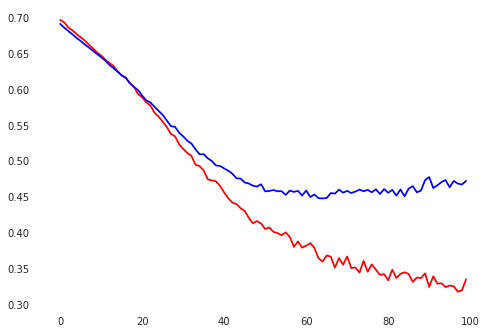

In [46]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(train_losses, "r-", test_losses, "b-")

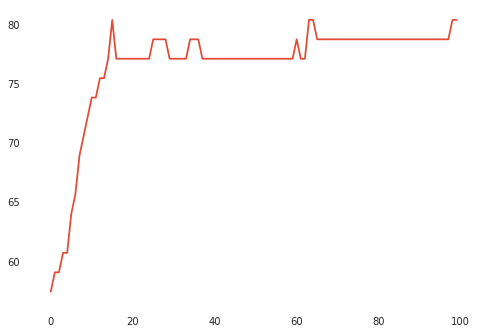

In [47]:
plt.plot(accuracies)

In [48]:
#Let's try and feed a single example in the neural network and see if it gets it right
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(validationDataset[index_from_the_validation_set][0].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    return preds_y

In [49]:
index_of_test=30

In [50]:
print(f"Neural network response is: {try_a_single_example_with_the_network(index_of_test).item()}")
print(f"Actual response is: {validationDataset[index_of_test][1].view(-1).item()}")


Neural network response is: 0
Actual response is: 0
